In [1]:
# Course - Data Wrangling
# Name - Vikas Ranjan
# Final Project - Milestone 5 - Final submission
#                Merging the Data and Storing in a Database/Visualizing Data

In [2]:
# load libraries needed to complete this assignment. 
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import warnings 
warnings.filterwarnings('ignore')

In [3]:
# Load up the cleaned datasets (csv, web & API) into dataframes 
stocks_csv_df = pd.read_csv("clean_fundamental.csv")
stocks_web_df = pd.read_csv("clean_stocks_web.csv")
stocks_api_df = pd.read_csv("clean_nasdaq_api.csv")

In [4]:
# Verify the attributes of the clean csv file (generated as part of Milestone 2) loaded into dataframes
stocks_csv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 72 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Unnamed: 0                                           448 non-null    int64  
 1   Ticker_Symbol                                        448 non-null    object 
 2   Period_Ending                                        448 non-null    object 
 3   Accounts_Payable                                     448 non-null    float64
 4   Accounts_Receivable                                  448 non-null    float64
 5   Add'l_income/expense_items                           448 non-null    float64
 6   After_Tax_ROE                                        448 non-null    float64
 7   Capital_Expenditures                                 448 non-null    float64
 8   Capital_Surplus                                      448 non-null    f

In [5]:
# Verify the attributes of the clean csv file (generated as part of Milestone 3) loaded into dataframes
stocks_web_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4245 entries, 0 to 4244
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Symbol             4245 non-null   object 
 1   Name               4194 non-null   object 
 2   Price_Intraday     4158 non-null   float64
 3   Change             4157 non-null   float64
 4   Percentage_Change  4244 non-null   float64
dtypes: float64(3), object(2)
memory usage: 165.9+ KB


In [6]:
# Verify the attributes of the clean csv file (generated as part of Milestone 4) loaded into dataframes
stocks_api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4245 entries, 0 to 4244
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         4245 non-null   int64  
 1   symbol             4245 non-null   object 
 2   name               4194 non-null   object 
 3   price              4158 non-null   float64
 4   changesPercentage  4244 non-null   float64
 5   change             4157 non-null   float64
 6   dayLow             4157 non-null   float64
 7   dayHigh            4157 non-null   float64
 8   yearHigh           4161 non-null   float64
 9   yearLow            4161 non-null   float64
 10  priceAvg50         3898 non-null   float64
 11  priceAvg200        3900 non-null   float64
 12  avgVolume          3898 non-null   float64
dtypes: float64(10), int64(1), object(2)
memory usage: 431.3+ KB


In [7]:
# Remove 'Unnamed: 0' from stocks_csv_df and stocks_api_df as it is unnecessary field.
stocks_csv_df = stocks_csv_df.drop(['Unnamed: 0'], axis=1)
stocks_api_df = stocks_api_df.drop(['Unnamed: 0'], axis=1)

In [8]:
# Load the dataframes into SQLlite 
conn = sqlite3.connect('Final_Project_DSC540.db')
stocks_csv_df.to_sql('stockscsv', conn, if_exists='replace', index=False)
stocks_web_df.to_sql('stocksweb', conn, if_exists='replace', index=False)
stocks_api_df.to_sql('stocksapi', conn, if_exists='replace', index=False)

In [9]:
# Check the database load for stockscsv
cursor_csvdata = conn.execute("SELECT * FROM stockscsv")
rows_csvdata = cursor_csvdata.fetchall()

In [10]:
# Check the database load for stocksweb
cursor_webdata = conn.execute("SELECT * FROM stocksweb")
rows_webdata = cursor_webdata.fetchall()

In [11]:
# Check the database load for stocksweb
cursor_apidata = conn.execute("SELECT * FROM stocksapi")
rows_apidata = cursor_apidata.fetchall()

In [12]:
# Perform a join the 3 tables stockscsv, stocksweb & stocksapi
# Build the query for the join 
Query = "SELECT csv.Ticker_Symbol, web.Name, csv.Capital_Expenditures, \
csv.Capital_Surplus, csv.Common_Stocks, \
csv.Fixed_Assets, csv.Goodwill, csv.Gross_Margin, csv.Gross_Profit, \
csv.Income_Tax, csv.Intangible_Assets, csv.Liabilities, \
csv.Net_Income, csv.Total_Assets, csv.Total_Equity, csv.Total_Revenue, \
web.Price_Intraday, web.Change, web.Percentage_Change, \
api.dayLow, api.dayHigh, api.yearHigh, api.yearLow, priceAvg50 \
FROM stockscsv AS csv \
INNER JOIN stocksweb AS web ON csv.Ticker_Symbol = web.Symbol \
INNER JOIN stocksapi AS api ON web.Symbol = api.symbol"

# Execute the query
mergeddata = conn.execute(Query)
# Fetch the extracted data in a cursor
merge_dta = mergeddata.fetchall()
merge_dta

[('AAL',
  'American Airlines Group Inc.',
  -6151000000.0,
  11591000000.0,
  6000000.0,
  27510000000.0,
  4091000000.0,
  73.0,
  29894000000.0,
  -2994000000.0,
  2249000000.0,
  -633000000.0,
  7610000000.0,
  48415000000.0,
  5635000000.0,
  40990000000.0,
  11.46,
  -0.14,
  -1.21,
  11.275,
  11.51,
  30.78,
  8.25,
  12.213714999999999),
 ('AAPL',
  'Apple Inc.',
  -12734000000.0,
  0.0,
  31251000000.0,
  27010000000.0,
  5414000000.0,
  39.0,
  84263000000.0,
  15685000000.0,
  3206000000.0,
  -1867000000.0,
  45687000000.0,
  321686000000.0,
  128249000000.0,
  215639000000.0,
  118.69,
  -0.135,
  -0.11,
  116.13,
  119.2,
  137.98,
  53.1525,
  115.06686),
 ('ADBE',
  'Adobe Inc.',
  -203805000.0,
  4616331000.0,
  61000.0,
  816264000.0,
  5406474000.0,
  86.0,
  5034522000.0,
  266356000.0,
  414405000.0,
  551550000.0,
  1168782000.0,
  12707114000.0,
  7424835000.0,
  5854430000.0,
  494.63,
  -1.84,
  -0.37,
  483.0,
  498.57,
  536.88,
  255.13,
  484.80515),
 ('ADI

In [13]:
# Parse the extracted Merged data and load them into a dataframe.
columns = ["Ticker_Symbol", "Company_Name", "Capital_Expenditures", "Capital_Surplus", "Common_Stocks", "Fixed_Assets", "Goodwill", "Gross_Margin", "Gross_Profit", "Income_Tax", "Intangible_Assets", "Liabilities", "Net_Income", "Total_Assets", "Total_Equity", "Total_Revenue", 
 "Stock_Price", "Change", "Percentage_Change", "DayLow", "DayHigh", "YearHigh", "YearLow", "PriceAvg50"]
data = []
for row in merge_dta:
  data.append(row)
merged_df = pd.DataFrame(data, columns=columns)

In [14]:
# Merged dataframe
merged_df

,Ticker_Symbol,Company_Name,Capital_Expenditures,Capital_Surplus,Common_Stocks,Fixed_Assets,Goodwill,Gross_Margin,Gross_Profit,Income_Tax,...,Total_Equity,Total_Revenue,Stock_Price,Change,Percentage_Change,DayLow,DayHigh,YearHigh,YearLow,PriceAvg50
0,AAL,American Airlines Group Inc.,-6.151000e+09,1.159100e+10,6.000000e+06,2.751000e+10,4.091000e+09,73.0,2.989400e+10,-2.994000e+09,...,5.635000e+09,4.099000e+10,11.46,-0.140,-1.21,11.275,11.5100,30.78,8.2500,12.213715
1,AAPL,Apple Inc.,-1.273400e+10,0.000000e+00,3.125100e+10,2.701000e+10,5.414000e+09,39.0,8.426300e+10,1.568500e+10,...,1.282490e+11,2.156390e+11,118.69,-0.135,-0.11,116.130,119.2000,137.98,53.1525,115.066860
2,ADBE,Adobe Inc.,-2.038050e+08,4.616331e+09,6.100000e+04,8.162640e+08,5.406474e+09,86.0,5.034522e+09,2.663560e+08,...,7.424835e+09,5.854430e+09,494.63,-1.840,-0.37,483.000,498.5700,536.88,255.1300,484.805150
3,ADI,"Analog Devices, Inc.",-1.273970e+08,4.022700e+08,5.136300e+07,6.361160e+08,1.679116e+09,65.0,2.227173e+09,9.525700e+07,...,5.165618e+09,3.421409e+09,133.50,3.100,2.38,130.010,133.7800,133.78,79.0800,120.242570
4,ADSK,"Autodesk, Inc.",-7.240000e+07,0.000000e+00,1.821500e+09,1.693000e+08,1.535000e+09,85.0,2.133400e+09,3.102000e+08,...,1.619600e+09,2.504100e+09,259.41,3.490,1.36,253.250,261.5907,268.44,125.3800,240.987720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,WYNN,"Wynn Resorts, Limited",-1.921240e+09,9.831310e+08,1.146000e+06,7.477478e+09,0.000000e+00,38.0,1.545509e+09,7.723000e+06,...,-1.119790e+08,4.075883e+09,80.07,-0.060,-0.07,77.625,80.8800,153.41,35.8400,73.336570
110,XEL,Xcel Energy Inc.,-3.683359e+09,5.889106e+09,1.268839e+09,3.120585e+10,0.000000e+00,36.0,3.990853e+09,5.427190e+08,...,1.060092e+10,1.102449e+10,73.31,-0.420,-0.57,73.180,74.4000,74.87,46.5800,71.010574
111,XLNX,"Xilinx, Inc.",-3.400400e+07,7.269210e+08,2.537000e+06,2.833460e+08,1.592960e+08,70.0,1.541974e+09,8.595800e+07,...,2.589893e+09,2.213881e+09,134.12,4.190,3.22,129.610,134.9500,134.95,67.6800,112.932570
112,XRAY,DENTSPLY SIRONA Inc.,-7.200000e+07,2.378000e+08,1.600000e+06,5.588000e+08,1.987600e+09,57.0,1.517200e+09,7.700000e+07,...,2.338000e+09,2.674300e+09,45.74,-0.870,-1.87,45.440,46.7550,60.87,31.5800,45.387714


In [15]:
# Merged dataframe
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ticker_Symbol         114 non-null    object 
 1   Company_Name          114 non-null    object 
 2   Capital_Expenditures  114 non-null    float64
 3   Capital_Surplus       114 non-null    float64
 4   Common_Stocks         114 non-null    float64
 5   Fixed_Assets          114 non-null    float64
 6   Goodwill              114 non-null    float64
 7   Gross_Margin          114 non-null    float64
 8   Gross_Profit          114 non-null    float64
 9   Income_Tax            114 non-null    float64
 10  Intangible_Assets     114 non-null    float64
 11  Liabilities           114 non-null    float64
 12  Net_Income            114 non-null    float64
 13  Total_Assets          114 non-null    float64
 14  Total_Equity          114 non-null    float64
 15  Total_Revenue         1

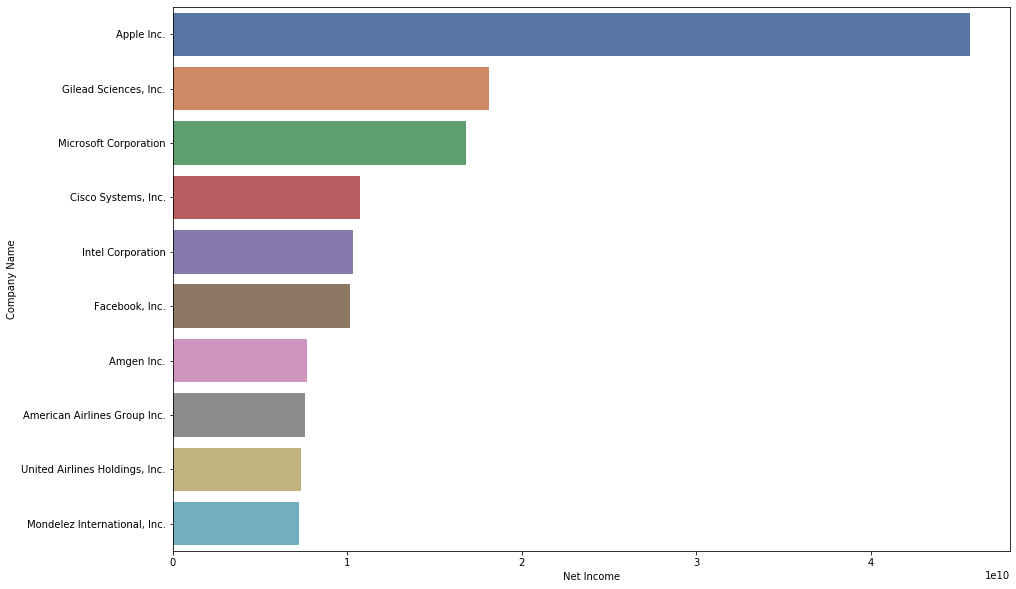

In [16]:
# Which are the top 10 earning companies in regards to net income
top_earning_companies = merged_df.sort_values('Net_Income', ascending = False).head(10).set_index('Company_Name')
plt.figure(figsize=(15,10))
fig = sns.barplot(top_earning_companies['Net_Income'], top_earning_companies.index, palette='deep')
fig.set(xlabel='Net Income', ylabel='Company Name')
plt.show()

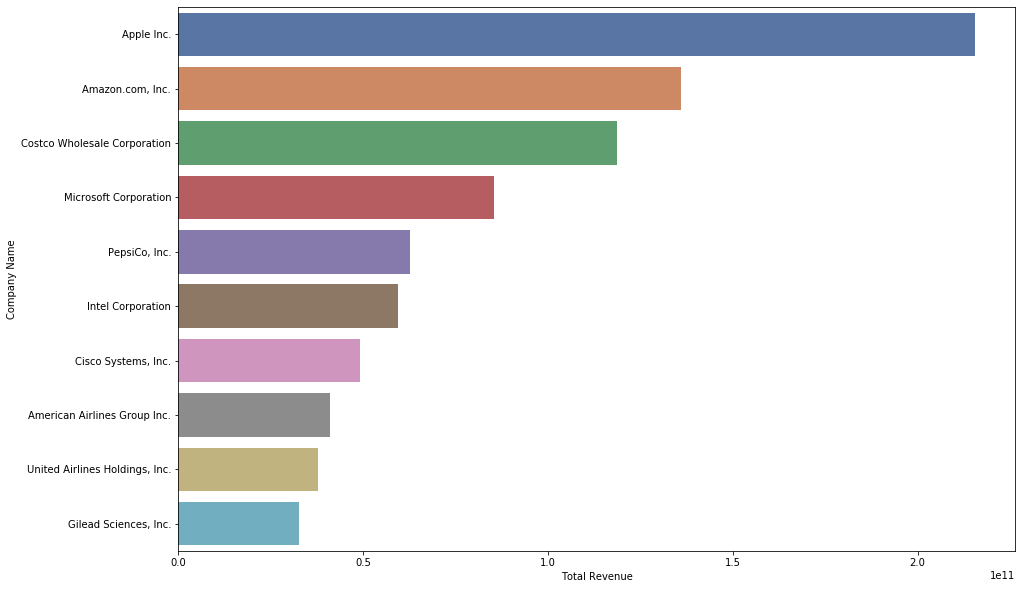

In [17]:
# Which are the top 10 companies when compared by total revenue
top_earning_companies = merged_df.sort_values('Total_Revenue', ascending = False).head(10).set_index('Company_Name')
plt.figure(figsize=(15,10))
fig = sns.barplot(top_earning_companies['Total_Revenue'], top_earning_companies.index, palette='deep')
fig.set(xlabel='Total Revenue', ylabel='Company Name')
plt.show()

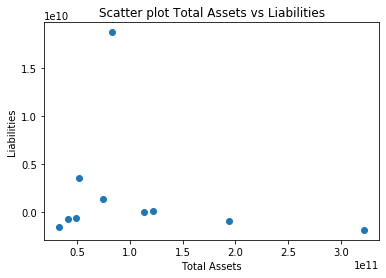

In [18]:
# Create Scatterplot of Total assets vs liabilities of top 10 earning companies by revenue
plt.scatter(top_earning_companies[['Total_Assets']], top_earning_companies[['Liabilities']])
plt.title('Scatter plot Total Assets vs Liabilities')
plt.xlabel('Total Assets')
plt.ylabel('Liabilities')
plt.show()

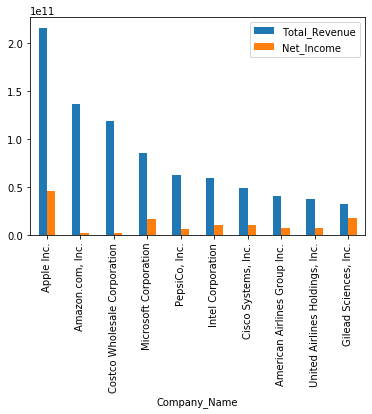

In [19]:
# Comparing Total revenue vs Net income of these top 10 earning companies from our dataset 
top_earning_companies.plot(y=["Total_Revenue", "Net_Income"], kind="bar")

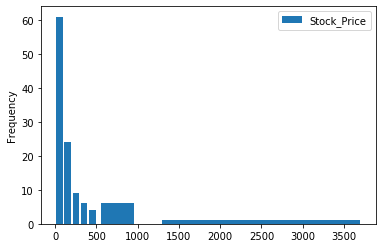

In [20]:
# Plot histogram of stock prices listed in the merged dataset
merged_df[['Stock_Price']].plot(kind='hist',bins=[0,100,200,300,400,500,1000,4000],rwidth=0.8)
plt.show()

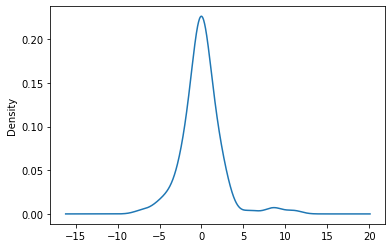

In [21]:
# Plot the Kernel Density function of Percentage change of the prices.
merged_df['Percentage_Change'].plot.kde()